In [20]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

In [21]:
#setting up the grid 
grid_size = 5
goal = (4,4)
obstacles = [(1,1), (3,1), (4,3), (2,4), (1,3)]

In [22]:
#Actions & Q table 
actions = ["UP", "DOWN", "LEFT", "RIGHT"]
q = np.zeros((grid_size, grid_size, len(actions)))

In [23]:
#submarine movements(actions)

def move(state, action):
    moves = {"UP" : (-1,0), "DOWN" : (1,0), "LEFT" : (0, -1), "RIGHT" : (0,1)}
    new_state = (state[0] + moves[action][0], state[1] + moves[action][1])
    return new_state if 0 <= new_state[0] < grid_size and 0 <= new_state[1] <grid_size and new_state not in obstacles else state

In [24]:
for _ in range(100):  # Fixed: Training loop indentation
    state = (0, 0)
    while state != goal:
        action = random.choice(actions)
        new_state = move(state, action)
        reward = 10 if new_state == goal else (-5 if new_state in obstacles else -1)
        
        # Fixed: Correct Q-table indexing
        q[state][actions.index(action)] += 0.5 * (reward + 0.9 * np.max(q[new_state]) - q[state][actions.index(action)])
        
        state = new_state

In [25]:
state, path = (0, 0), [(0, 0)]
while state != goal:
    action = actions[np.argmax(q[state])]
    state = move(state, action)
    path.append(state)

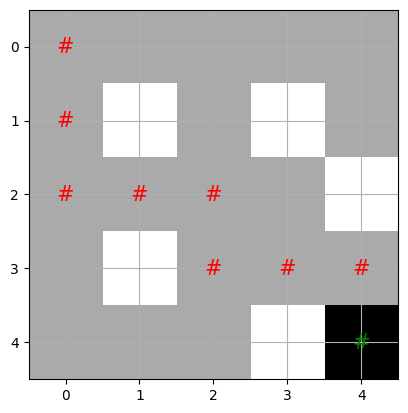

In [26]:
grid = np.zeros((grid_size, grid_size))
for obs in obstacles:
    grid[obs] = -1  # Fixed: Correct obstacles indexing

grid[goal] = 2  # Mark goal position

plt.imshow(grid, cmap="gray_r", origin="upper")
for (x, y) in path:
    plt.text(y, x, "#", ha="center", va="center", fontsize=15, color="red" if (x, y) != goal else "green")

plt.xticks(range(grid_size))
plt.yticks(range(grid_size))
plt.grid(True)
plt.show() 